In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import json

from ccb.experiment import parse_results
from ccb.experiment.retrieve_runs import retrieve_runs, find_missing_runs


%load_ext autoreload
%autoreload 2

## RGB Experiments


In [5]:
# directory where all the sweeps experiments are logged
classification_dir =  '/mnt/data/experiments/nils/last_classification_sweeps'
# classification_dir = '/mnt/data/experiments/nils/final_classification_seeded_runs'
segmentation_dir =  '/mnt/data/experiments/nils/last_segmentation_sweeps'
# segmentation_dir = "/mnt/data/experiments/nils/final_segmentation_seeded_runs"

df = retrieve_runs(classification_dir, use_cached_csv=False, is_sweep=True)

df_1x = df[(df["partition_name"] == "1.00x_train") | (df["partition_name"] == "default")]

100%|██████████| 7094/7094 [01:54<00:00, 61.78it/s]


In [6]:
# parse_results.count_exp(df[df["partition_name"]=="0.10x_train"])
parse_results.count_exp(df)

model                                 conv4  convnext_base  \
dataset               partition_name                         
bigearthnet           0.01x_train      12.0           11.0   
                      0.02x_train       9.0           12.0   
                      0.05x_train      12.0            9.0   
                      0.10x_train      12.0           12.0   
                      0.20x_train      12.0           12.0   
                      0.50x_train      12.0           12.0   
                      1.00x_train      12.0           12.0   
brick_kiln_v1.0       0.01x_train      12.0           12.0   
                      0.02x_train      12.0           12.0   
                      0.05x_train      12.0           12.0   
                      0.10x_train      12.0           12.0   
                      0.20x_train      12.0           12.0   
                      0.50x_train      12.0           12.0   
                      1.00x_train      12.0           12.0   
eurosat               0.01x_train      12.0           12.0   
                      0.02x_train      11.0           12.0   
                      0.05x_train      12.0           12.0   
                      0.10x_train      12.0           11.0   
                      0.20x_train       7.0           12.0   
                      0.50x_train      12.0           12.0   
                      1.00x_train      12.0           12.0   
forestnet_v1.0        0.01x_train      12.0           12.0   
                      0.02x_train      12.0           12.0   
                      0.05x_train      12.0           12.0   
                      0.10x_train      12.0           12.0   
                      0.20x_train      12.0           12.0   
                      0.50x_train      12.0           12.0   
                      1.00x_train      12.0           12.0   
pv4ger_classification 0.01x_train      12.0           12.0   
                      0.02x_train      12.0           12.0   
                      0.05x_train      12.0           12.0   
                      0.10x_train      12.0           10.0   
                      0.20x_train      12.0           12.0   
                      0.50x_train      12.0           12.0   
                      1.00x_train      12.0           12.0   
so2sat                0.01x_train      12.0           12.0   
                      0.02x_train      12.0           11.0   
                      0.05x_train      12.0           12.0   
                      0.10x_train      12.0           12.0   
                      0.20x_train      12.0           12.0   
                      0.50x_train      12.0           12.0   
                      1.00x_train      12.0           12.0   

model                                 millionaid_resnet50  moco_resnet18  \
dataset               partition_name                                       
bigearthnet           0.01x_train                    12.0           12.0   
                      0.02x_train                    12.0            9.0   
                      0.05x_train                    12.0           12.0   
                      0.10x_train                    12.0           12.0   
                      0.20x_train                    12.0           12.0   
                      0.50x_train                    12.0           12.0   
                      1.00x_train                    12.0           12.0   
brick_kiln_v1.0       0.01x_train                    12.0           12.0   
                      0.02x_train                    12.0           12.0   
                      0.05x_train                    12.0           12.0   
                      0.10x_train                    12.0           12.0   
                      0.20x_train                    12.0           12.0   
                      0.50x_train                    12.0           12.0   
                      1.00x_train                    12.0           12.0   
eurosat               0.01x_train                    12

: 

In [4]:
# generate best hparam config from sweeps for seeded runs
best_runs = parse_results.find_best_hparam_for_seeds(df)
# print(best_runs)
with open("/mnt/home/climate-change-benchmark/ccb/configs/best_hparams_classification.json", "w") as f:
    json.dump(best_runs, f)

In [ ]:

df_1x = df[(df["partition_name"] == "1.00x_train") | (df["partition_name"] == "default")]

# df_05x = df[df["partition_name"]=="0.01x_train"]
best_points_df = parse_results.plot_all_models_datasets(df_1x, plot_fn=parse_results.make_plot_sweep(filt_size=10, top_k=6, legend=False), fig_size=(40,40))
plt.tight_layout()


In [ ]:

# plt.rcParams['figure.figsize'] = [40, 40]

parse_results.plot_all_datasets(df_1x, model="ssl_moco_resnet50", plot_fn=parse_results.make_plot_sweep(filt_size=20, top_k=6, legend=True), fig_size=(10,20))
# parse_results.plot_all_datasets(df_1x, model="resnet50")

plt.tight_layout()


In [ ]:
parse_results.plot_all_models_datasets(df_1x, plot_fn=parse_results.make_plot_sweep(filt_size=20, top_k=6, legend=False), fig_size=(40,40))
plt.tight_layout()

## Beyond RGB experiments



In [4]:
classification_dir = "/mnt/data/experiments/nils/beyond_rgb_classification_sweeps"
classification_dir = "/mnt/data/experiments/nils/final_classification_beyond_rgb_seeded_runs"
df = retrieve_runs(classification_dir, use_cached_csv=False, is_sweep=False)

 48%|████▊     | 69/145 [00:02<00:02, 35.37it/s]/mnt/home/climate-change-benchmark/ccb/experiment/parse_results.py:329: UserWarning: Not enough steps in /mnt/data/experiments/nils/final_classification_beyond_rgb_seeded_runs/1.00x_train_classification_v0.7_10-26-2022_13:51:03_vit_small_patch16_224/eurosat/seed_0/csv_logs/version_0. len(trace_dict['val_metric']) = 1.
  warn(f"Not enough steps in {log_dir}. len(trace_dict['val_metric']) = {len(trace_dict['val_metric'])}.")
100%|██████████| 145/145 [00:05<00:00, 28.26it/s]


In [5]:
parse_results.count_exp(df)

model                           moco_resnet50  moco_vit_small_patch16_224  \
dataset         partition_name                                              
bigearthnet     1.00x_train                12                          12   
brick_kiln_v1.0 1.00x_train                12                          12   
eurosat         1.00x_train                12                          12   

model                           resnet50  vit_small_patch16_224  
dataset         partition_name                                   
bigearthnet     1.00x_train           12                     12  
brick_kiln_v1.0 1.00x_train           12                     12  
eurosat         1.00x_train           12                     12

bigearthnet
brick_kiln_v1.0
eurosat


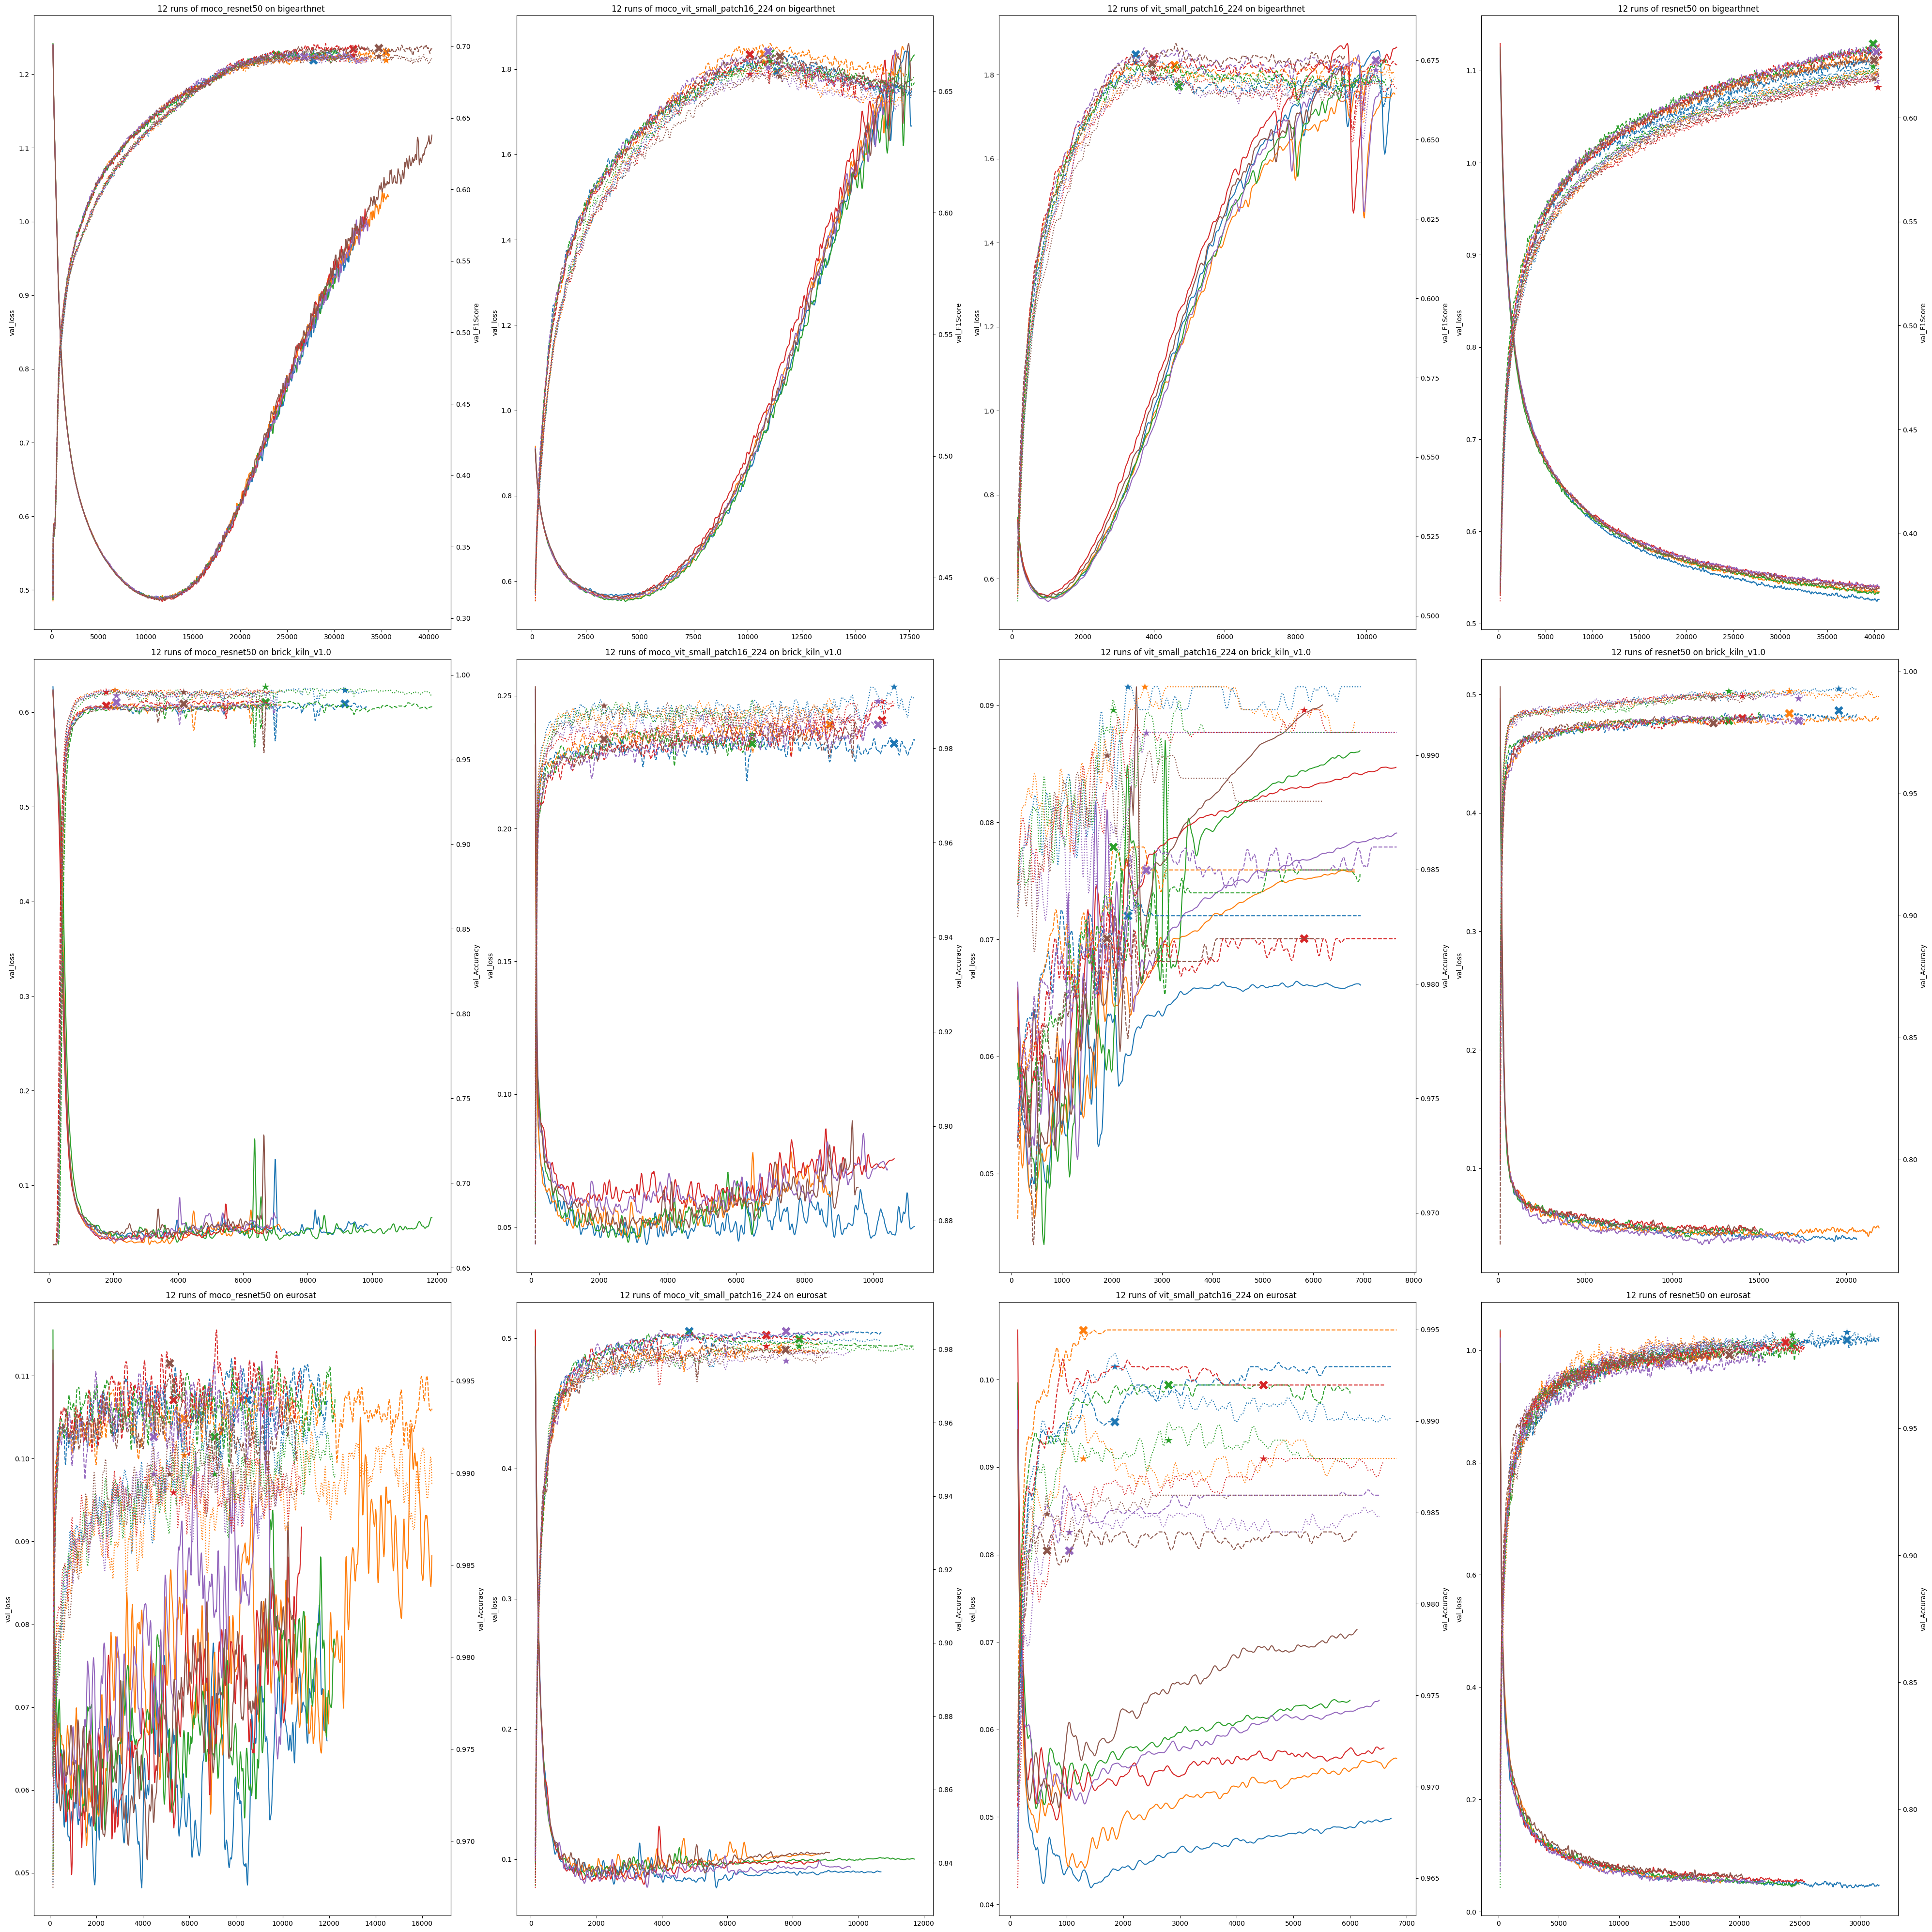

In [7]:
df_1x = df[(df["partition_name"] == "1.00x_train")]
best_points_df = parse_results.plot_all_models_datasets(df_1x, plot_fn=parse_results.make_plot_sweep(filt_size=10, top_k=6, legend=False), fig_size=(40,40))
plt.tight_layout()